<a href="https://colab.research.google.com/github/femunoz/AED/blob/main/Arboles_Binarios_Estructuras_de_Datos_Elementales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install aed-utilities

  Created wheel for aed-utilities: filename=aed_utilities-0.5.2-cp37-none-any.whl size=4468 sha256=6fcc524cde66dbfb97a86d17a314d652dd5a0536ebf20e680bcfb6f87af22ac4
  Stored in directory: /root/.cache/pip/wheels/68/e6/33/33cadc26cc3b96e6f5830bb498d2c521b2e0fca7069fd52473
Successfully built aed-utilities


## Árboles Binarios

Al usar nodos que hacen referencia a otros nodos, no es de ninguna manera obligatorio limitarse a estructuras lineales como las que hemos visto en las secciones anteriores: podemos construir estructuras enlazadas tan complejas como queramos.

Un tipo de estructura muy utilizada son los *árboles binarios*, en que cada nodo puede tener "hijos" tanto a su izquierda como a si derecha, y eso mismo se reproduce para los hijos, recursivamente.

Los nodos tienen un formato similar al de los nodos de doble enlace, pero las referencias se llaman `izq` (izquierda) y `der` (derecha).

![Nodo-arbol-binario](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo-arbol-binario.png?raw=1)

Al dibujarlo con nodos circulares, normalmente las líneas no llevan flecha, porque se entiende que apuntan hacia abajo:

![Nodo-arbol-binario-circular](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo-arbol-binario-circular.png?raw=1)

In [2]:
class Nodo:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der

La siguiente figura muestra un ejemplo de un árbol binario:

![ejemplo-ABB](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/ejemplo-ABB.png?raw=1)

Este es un tipo especial de árbol binario, llamado *árbol de búsqueda binaria* (*ABB*), que se caracteriza porque para cada nodo, sus hijos descendientes hacia la izquierda son menores que él, y los de la derecha son mayores. Más adelante estudiaremos en profundidad los ABB.

La terminología asociada a los árboles combina lo forestal con lo genealógico. El nodo de nivel superior se llama la *raíz* y los nodos que están en los niveles inferiores (los nodos cuadrados en la figura) se llaman *hojas*. Como vemos, al revés que en la naturaleza, estos árboles crecen hacia abajo.

Un nodo apunta hacia abajo a sus hijos (izquierdo y derecho), y se dice que es el *padre* de ellos. Yendo desde un nodo hacia abajo se encuentran sus *descendientes*, y hacia arriba se encuentran sus *ancestros*.

Si el nodo $b$ es descendiente del nodo $a$, se dice que la distancia entre $a$ y $b$ es el número de pasos que hay que dar para ir de $a$ a $b$. La máxima distancia entre la raíz y una hoja se llama la *altura* del árbol. En el ejemplo, la altura es $5$, que se alcanza yendo desde la raíz hasta cualquiera de las hojas hijas de $65$ o de $81$.

Al dibujar un árbol con nodos circulares y nodos cuadrados, los circulares se llaman *nodos internos* y los cuadrados, *nodos externos*. Los nodos internos siempre tienen dos hijos (internos y/o externos) y los nodos externos no tienen hijos.

La altura máxima de un árbol binario con $n$ nodos internos es $n$, y la altura mínima es $\lceil \log_2{(n+1)} \rceil$. Esto último es una consecuencia de que un árbol binario de altura $h$ puede tener a lo más $2^h$ nodos externos.

A continuación definiremos una clase árbol, con un constructor que define un puntero al nodo raíz. Para poder hacer ejemplos de uso, admitiremos que el constructor reciba un puntero a la raíz de un árbol ya construido. 

In [3]:
class Arbol:
    def __init__(self,raiz=None):
        self.raiz=raiz

### Recorridos de Árboles Binarios

Un árbol binario es una estructura esencialmente recursiva, y las principales formas de recorrer un árbol se definen también recursivamente.
Los tres tipos de recorridos más conocidos son:

* Preorden: Visitar la raíz, recorrer el subárbol izquierdo y recorrer el subárbol derecho

* Indorden: Recorrer el subárbol izquierdo, visitar la raíz y recorrer el subárbol derecho

* Postorden: Recorrer el subárbol izquierdo, recorrer el subárbol derecho y visitar la raíz

A continuación agregamos a la definición de la clase tres métodos que imprimen en contenido del árbol en estos recorridos:

In [4]:
import aed_utilities as aed

def pre(p):
    if p is not None:
        print(p.info,end=" ")
        pre(p.izq)
        pre(p.der)

def ino(p):
    if p is not None:
        ino(p.izq)
        print(p.info,end=" ")
        ino(p.der)

def post(p):
    if p is not None:
        post(p.izq)
        post(p.der)
        print(p.info,end=" ")
        
class Arbol:
    def __init__(self,raiz=None):
        self.raiz=raiz
        
    def preorden(self):
        print("Preorden:", end=" ")
        pre(self.raiz)
        print()
        
    def inorden(self):
        print("Inorden:", end=" ")
        ino(self.raiz)
        print()
        
    def postorden(self):
        print("Postorden:", end=" ")
        post(self.raiz)
        print()
    
    # Para dibujar un árbol binario, necesitamos crear una instancia de la clase BinaryTreeDrawer
    # Aquí también necesitamos conocer la estructura de los nodos. Esta información se envía como parámetro 
    # al constructor de la clase:
    #    - fieldData: nombre del campo del nodo que mantiene la data
    #    - fieldLeft: nombre del campo del nodo con el puntero izquierdo
    #    - fieldRight: nombre del campo del noso con le puntero derecho
    # Para dibujar se llama al método "draw_tree", enviando como parámetro el árbol binario y el nombre del campo que identifica al nodo raiz.
    
    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der")
      btd.draw_tree(self, "raiz")


In [5]:
AX=Arbol(
    Nodo(
        Nodo(
            Nodo(None,15,None),
            20,
            Nodo(
                Nodo(None,30,None),
                35,
                None
            )
        ),
        42,
        Nodo(
            Nodo(
                Nodo(
                    Nodo(Nodo(None,62, None),65,None),
                    72,
                    Nodo(None,81,None)
                ),
                90,
                None
            ),
            95,
            None
        )
       )
)

AX1 = Arbol(Nodo(Nodo(Nodo(None,7,None),10,Nodo(None, 12, None)),18, Nodo(Nodo(None, 20,None),24,Nodo(None, 30, None))))
AX2 = Arbol(Nodo(None, 10, Nodo(None, 12, Nodo(None, 14, Nodo(None, 20, None)))))
AX3 = Arbol(Nodo(Nodo(Nodo(None,5,None),7,Nodo(None, 9, None)),10,None))

In [6]:
AX.preorden()
AX.inorden()
AX.postorden()

Preorden: 42 20 15 35 30 95 90 72 65 62 81 
Inorden: 15 20 30 35 42 62 65 72 81 90 95 
Postorden: 15 30 35 20 62 65 81 72 90 95 42 


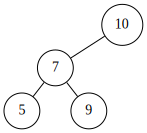

In [7]:
AX3.dibujar()